In [11]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/home/kumarv/khand035/.conda/envs/gdalenv/lib/python2.7/site-packages/')
from osgeo import gdal,ogr
%matplotlib inline

In [41]:
data_dir = '/home/kumarv/khand035/Projects/MINT/river-depth-estimation/data/DEMBasedBox2-1/'
rasterFormat = 'GTiff' # for now assuming output format is going to GTiff
rasterDriver = gdal.GetDriverByName(rasterFormat)

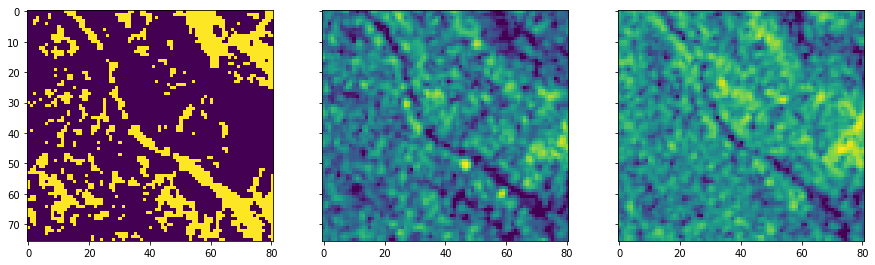

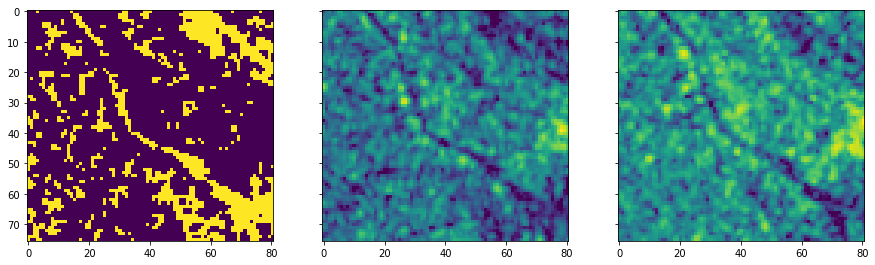

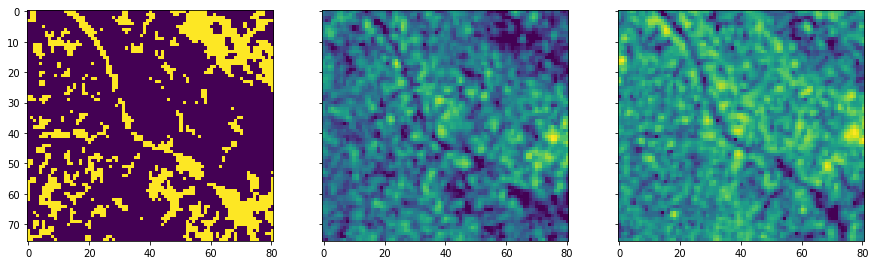

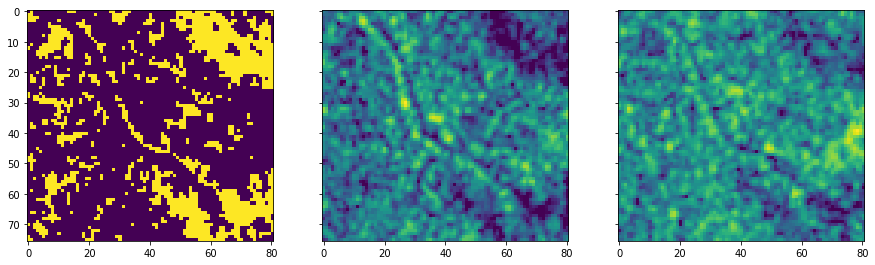

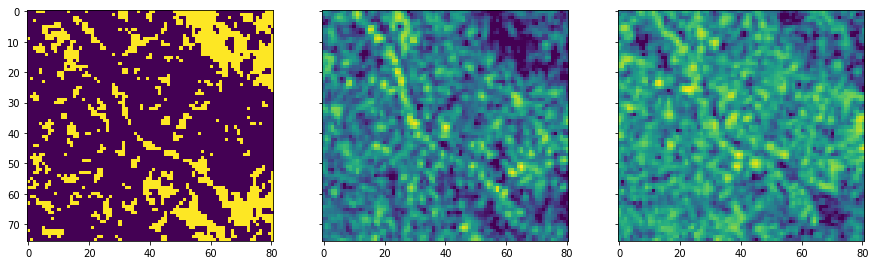

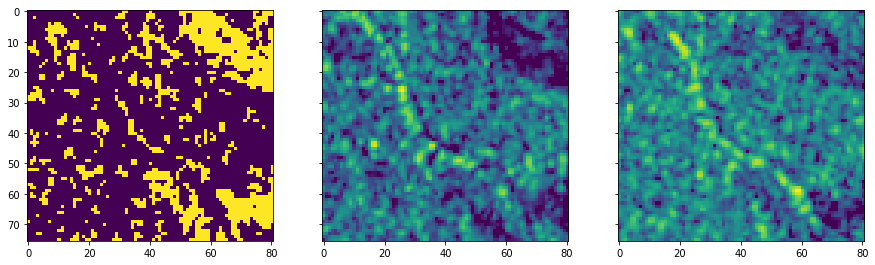

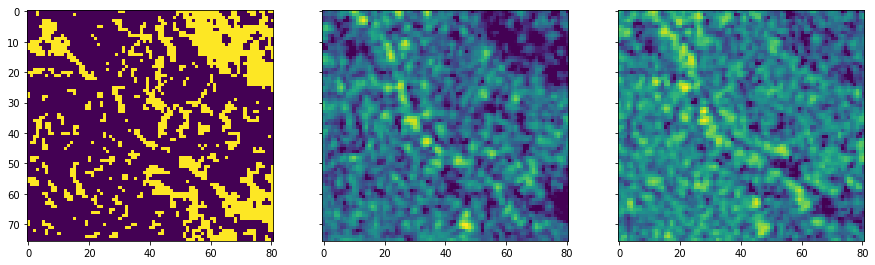

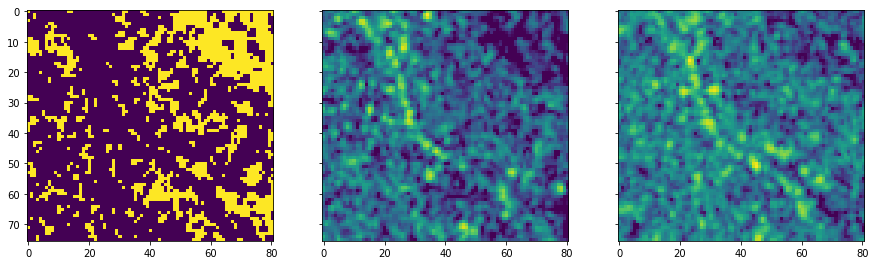

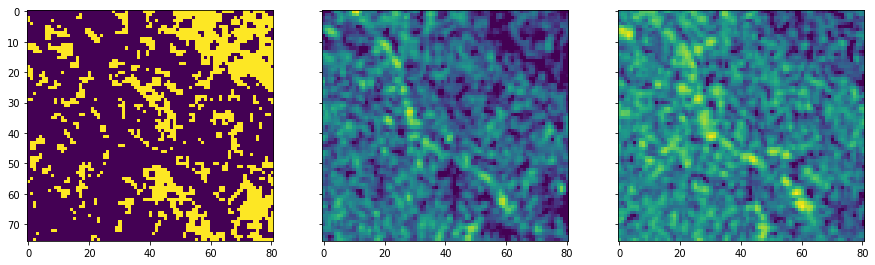

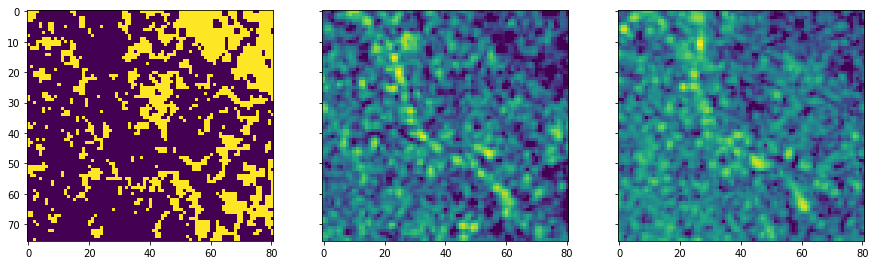

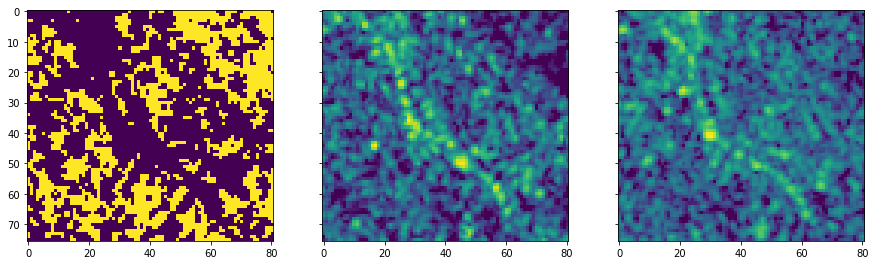

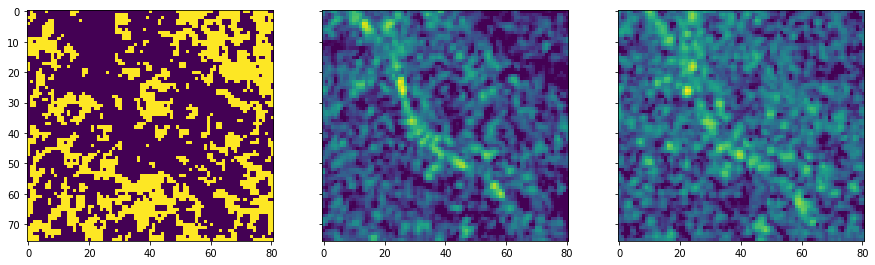

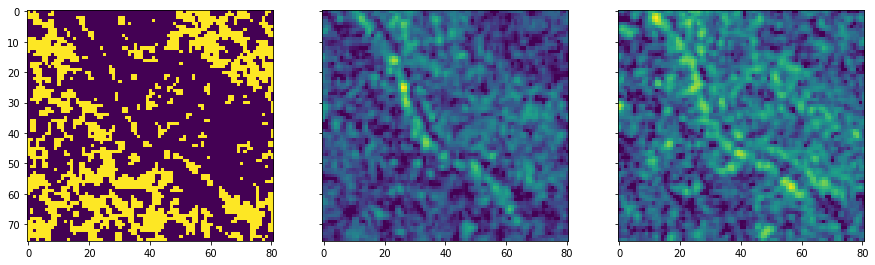

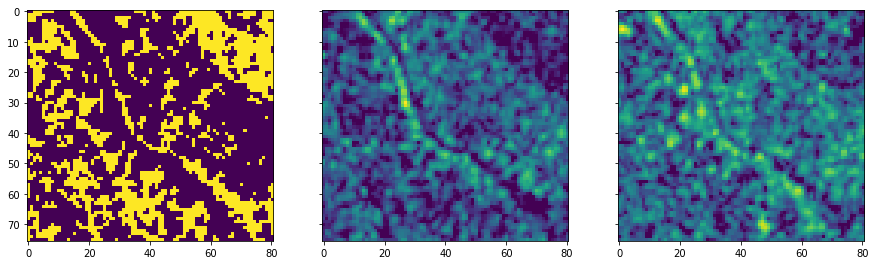

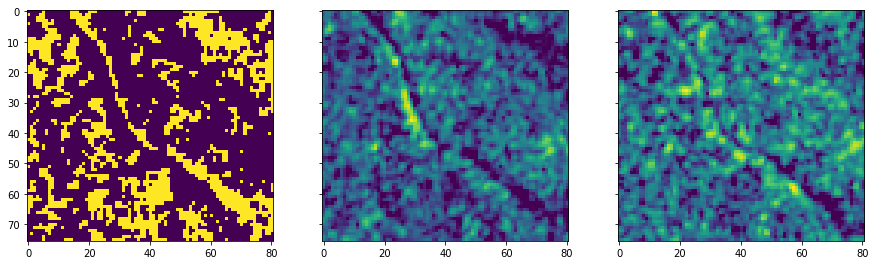

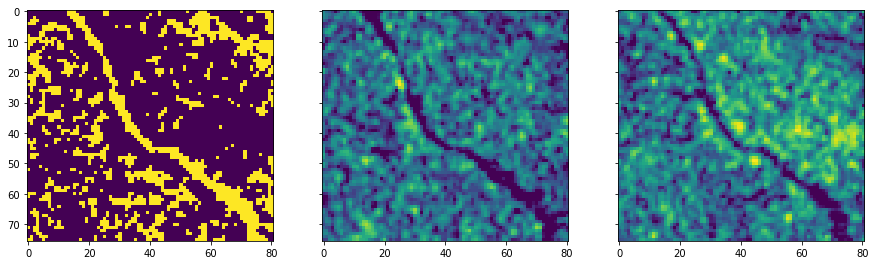

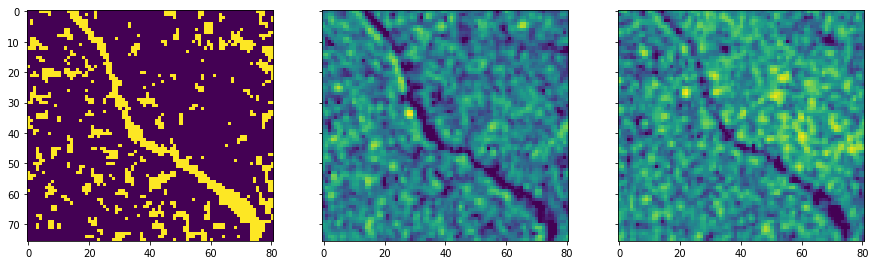

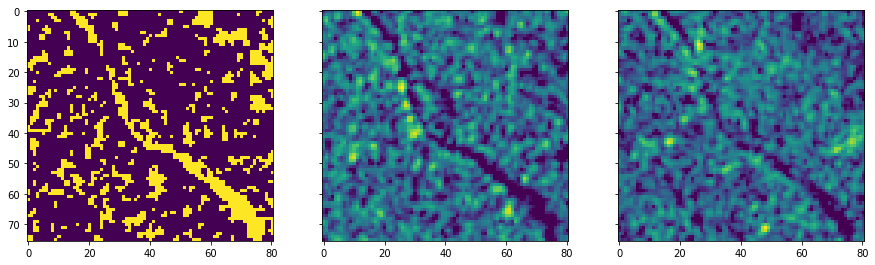

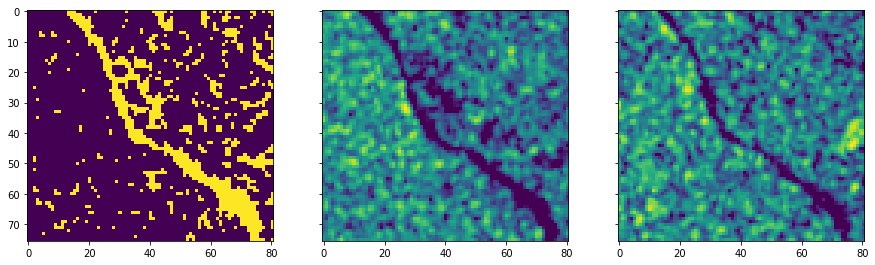

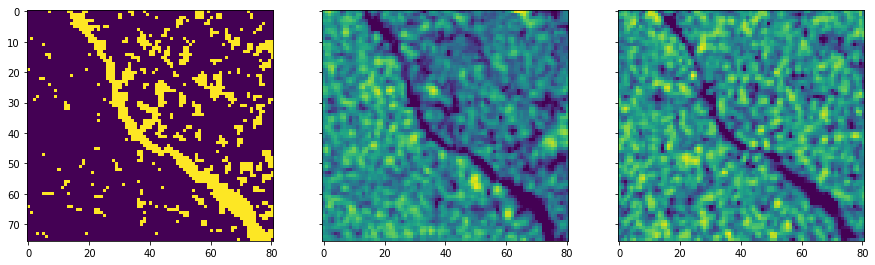

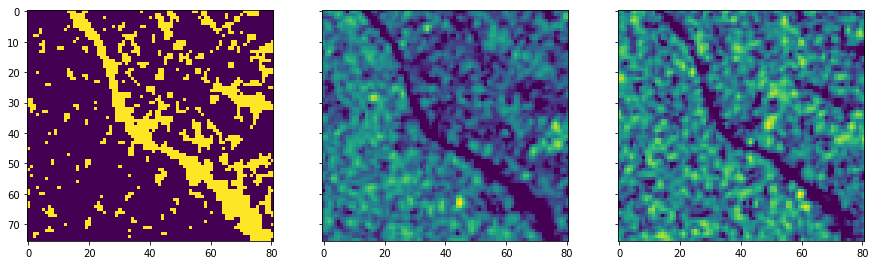

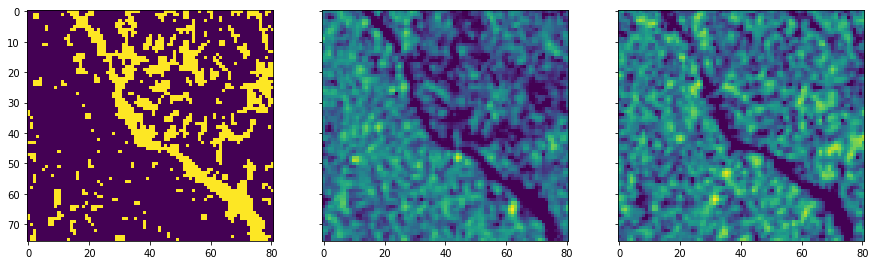

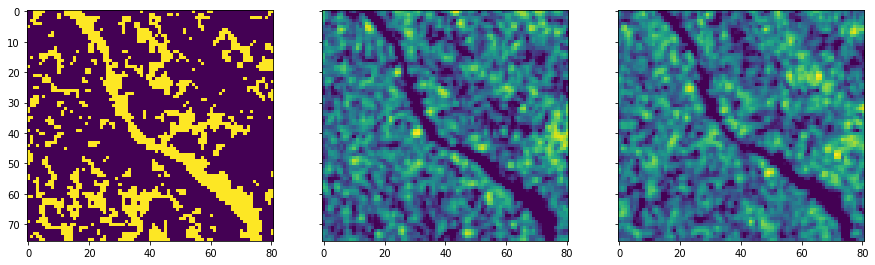

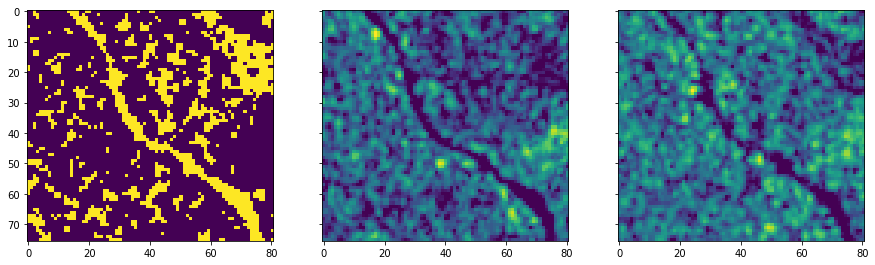

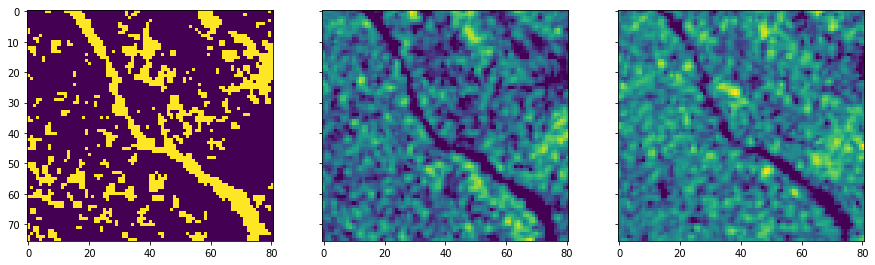

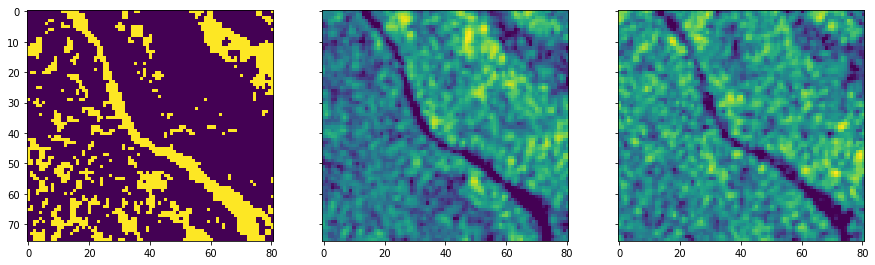

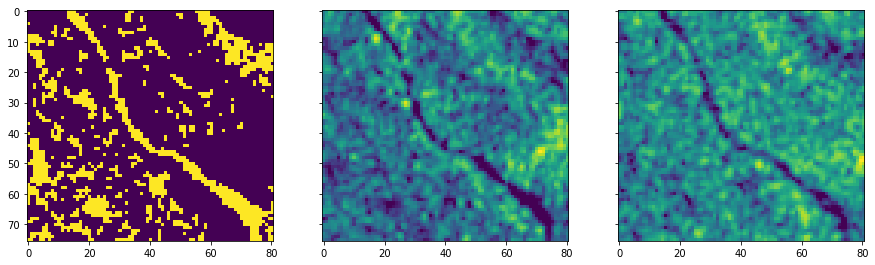

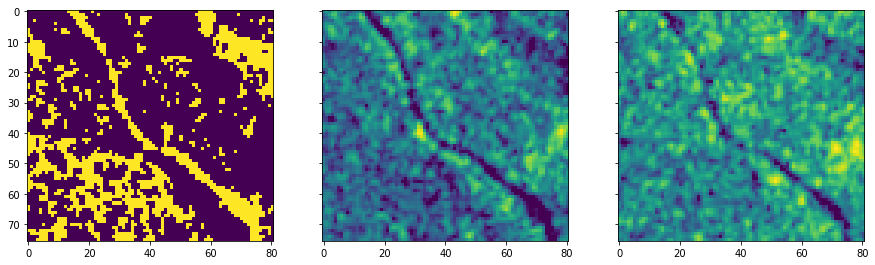

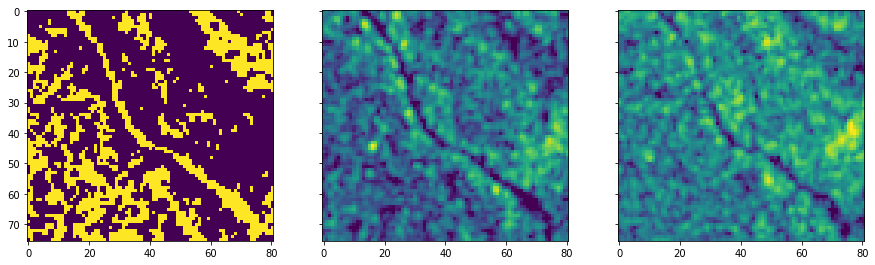

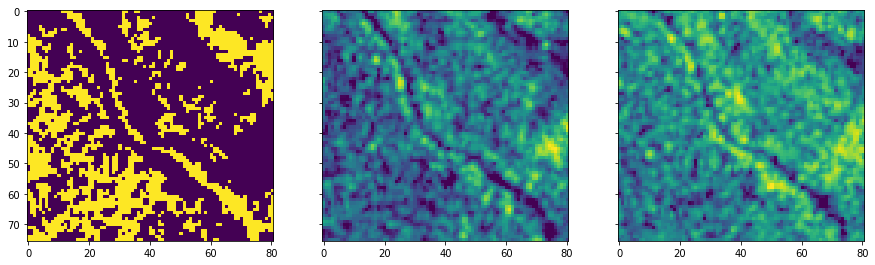

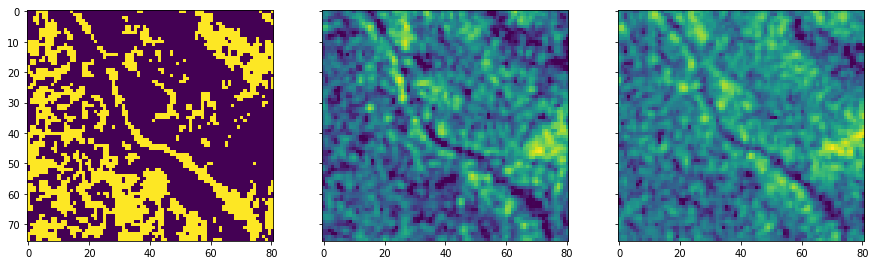

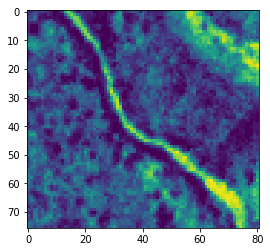

In [43]:
flag = 0
for mask in os.listdir(data_dir):
    if mask[0:2] == '20':
        for vvtif in os.listdir(data_dir):
            if mask[0:-4] in vvtif and 'VV' in vvtif and vvtif.endswith('tif'):
                break
        #print vvtif
        for vhtif in os.listdir(data_dir):
            if mask[0:-4] in vhtif and 'VH' in vhtif and vhtif.endswith('tif'):
                break
        #print vhtif
        ds = gdal.Open(data_dir + mask)
        vvs = gdal.Open(data_dir + vvtif)
        vhs = gdal.Open(data_dir + vhtif)
        
        numchannels = ds.RasterCount
        cols = ds.RasterXSize
        rows = ds.RasterYSize
        mask_arr = np.array(ds.GetRasterBand(1).ReadAsArray())
        vvs_arr = np.array(vvs.GetRasterBand(1).ReadAsArray())
        vhs_arr = np.array(vhs.GetRasterBand(1).ReadAsArray())
        if flag==0:
            mask_sum = mask_arr
            flag = 1
        else:
            mask_sum = mask_sum + mask_arr

        f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True,figsize=(15,10))
        ax1.imshow(mask_arr)
        ax2.imshow(vvs_arr)
        ax3.imshow(vhs_arr)

plt.figure()
plt.imshow(mask_sum)
        
        
        

In [16]:
mask_arr.shape

(46, 60)

In [ ]:
# Prerequisites: python 3.6 or later
import requests
import json
import uuid
# Now we can search for data
# 1) Searching by standard_names

search_query_1 = {
    "standard_variable_names__in": ["River_Width_Standard_Variable"]
}

resp = requests.post(f"{url}/datasets/find", 
                                        headers=request_headers,
                                        json=search_query_1).json()
if resp['result'] == 'success':
    found_resources = resp['resources']
    print(f"Found {len(found_resources)} resources")
    print(found_resources[0])